# **Final Report**
- Name: 유나현, 박도희, 이서정, 문희경 (team 7)
- ID Number: 20196384, 20180644, 20206894, 20200165

# **1. 서론**

4차 산업혁명의 시대를 맞아 농업 분야에서도 스마트 팜 같이 IT 기술을 적극 활용하여 더 효율적으로 작물을 재배하고 있는 추세이다. 이에 더하여, AI를 기반으로 작물의 효율적인 생육을 위한 최적의 환경을 예측한다면 식물 재배에 큰 도움이 될 것으로 보인다. 이런 상황에 맞춰, Dacon에서 진행하는 생육 환경 최적화 경진대회에 참가하였다. 이 대회의 주제는 청경채 사진과 환경 데이터를 활용한 잎면적 예측 알고리즘을 개발하는 알고리즘 분야와, 적상추 데이터 활용 생육정도를 알 수 있는 정량 지표를 발굴하는 분석 분야로 나뉘는데, 수업에서 배웠던 딥러닝을 활용하기 위해 알고리즘 부문으로 참여하였다.

이 대회는 인공지능(AI)를 활용하여 국내 고유 식물자원에서 유용한 천연물 소재를 탐색하고, 그 효능과 활성 등에 대해 연구하는 기관인 KIST 강릉분원이 주최하였다. 2022년 4월 18일부터 5월 20일까지 진행되었으며, 총 136팀이 참여하였다. 

# **2. 통계적 방법**

###CNN(합성곱신경망: Convolution Neural Network)

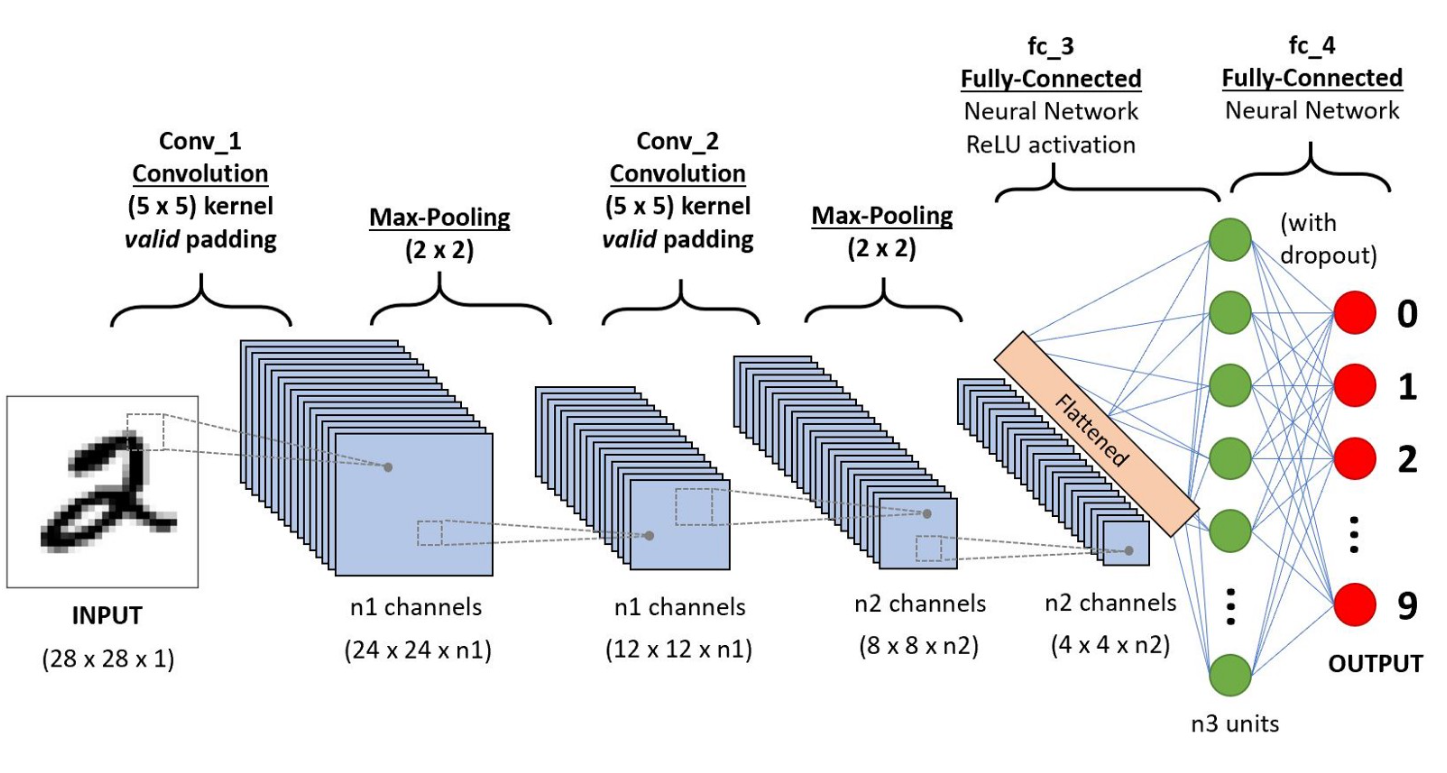

CNN은 이미지 분석을 위하여 사용되는 딥러닝 알고리즘으로, 데이터의 특징을 추출하여 특징들의 패턴을 파악하는 구조로 되어있다. Convolution Layer와 Pooling Layer를 복합적으로 구성하여 알고리즘을 만든다.

- Convolution Layer: 입력 이미지을 여러 개의 필터에 통과시키고, 각 필터는 이미지에서 특정 특징을 활성화한다.
- Pooling Layer: 비선형 다운샘플링을 수행하여 신경망이 학습해야 하는 파라미터의 개수를 줄임으로써 결과값의 크기를 줄일 수 있다.
- Dropout Layer: 학습 과정에서 무작위로 부분적인 뉴런을 제거하여 과적합을 방지한다.
- Flatten Layer: Convolution Layer와 Pooling Layer를 반복적으로 거치며 중요한 특징만 추출된 후, 2차원의 데이터를 분류를 위한 학습을 위해 1차원으로 바꿔준다.
-Activation Function: 데이터의 폭을 조절하여 비선형값으로 바꾸어주는 함수로, ReLU, Sigmoid, Tanh 등이 있는데 CNN에서는 보통 ReLU를 사용한다.

이러한 연산이 다수의 계층에 의해 반복되며, 각 계층은 서로 다른 특징을 식별하도록 학습한 후 분류 계층으로 넘어간다. CNN의 마지막 분류 계층은 Softmax 함수 등을 사용하여 분류 출력을 제공한다. 분류 계층 외에도 회귀 계층 같이 회귀 과제를 해결할 수 있는 출력도 가능하다.

###RNN(순환신경망: Recurrent Neural Network)

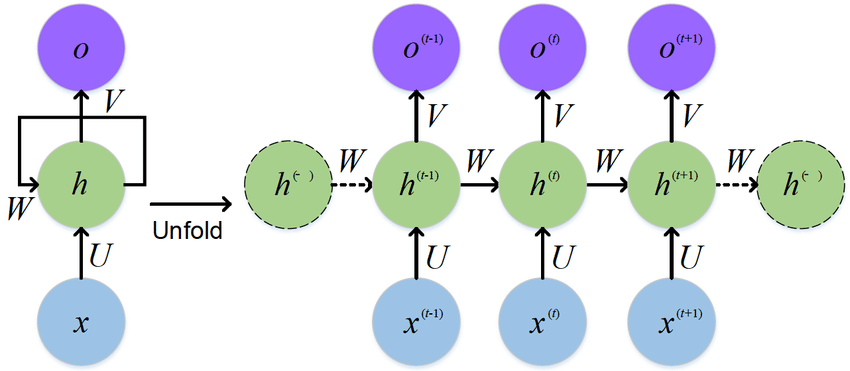

RNN은 입력과 출력을 시퀀스(Sequence) 단위로 처리하는 모델이다. 여기서 시퀀스란 연관된 연속의 데이터, 즉 순서가 있는 데이터를 의미하는데, 시계열 데이터에 적합한 신경망 모델이라 할 수 있다. RNN의 경우, 파라미터들이 서로 독립적인 DNN 등의 알고리즘과 달리, 파라미터를 서로 공유하는 것이 특징이다.

## Bidirectional RNN

시계열 데이터의 현재 시간 이전 정보뿐만 아니라, 이후 정보까지 저장해서 활용할 수 있다면 더 좋은 성능을 기대할 수 있을 것이다. Bidirectional RNN을 이용하면, 이전 정보와 이후 정보를 모두 저장할 수 있다. 

Bidirectional RNN의 모형 구조는 아래와 같다.

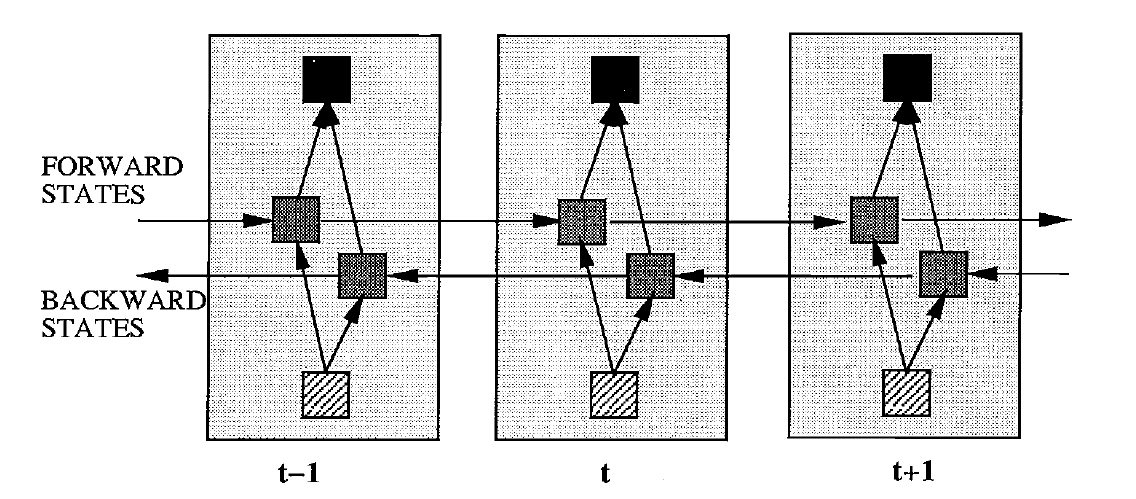

위의 그림에서 알 수 있듯이, Bidirectional RNN는 2개의 Hidden Layer를 가지고 있다. 전방향 상태(Forward States) 정보를 가지고 있는 Hidden Layer와 후방향 상태(Backward States) 정보를 가지고 있는 Hidden layer가 있고, 이 둘은 서로 연결되어 있지 않다. 하지만, 입력값은 이 2가지 Hidden Layer에 모두 전달되고, Output Layer도 이 2가지 Hidden Layer로 모두 값을 받아서 최종 Output을 계산한다. 

이를 수식으로 나타내면 아래와 같다. 

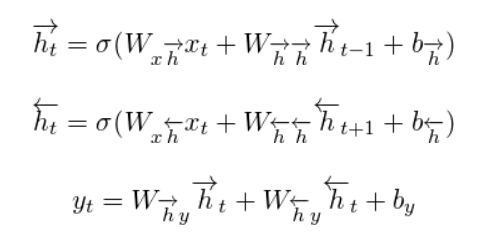

Forwardpass 계산을 진행하는 것은 일반적인 RNN과 같다. 하지만 Forward hidden layer와 Backward hidden layer에 input 값을 반대 방향으로 집어넣고, Output layer 값은 두방향의 Hidden layer에 모든 input이 적용된 후에 계산하는 것에 차이가 있다. 

Backwardpass의 가중치를 업데이트 할때는, 기본적인 RNN와 같이 BPTT를 이용하지만, output layer에서 모든 시간에 대해 에러값 delta를 먼저 계산하고, 이를 Forward hidden layer와 Backward hidden layer에 반대 방향으로 전달한다는 차이가 있다.

### **장기 의존성 문제점(Long-Term Dependency Problem)** 
일반적인 RNN의 경우 짧은 시퀀스를 처리할 때 효과적이며, 관련 정보와 그 정보를 사용하는 지점 사이 거리가 멀어지는 경우 성능이 현저하게 떨어진다.

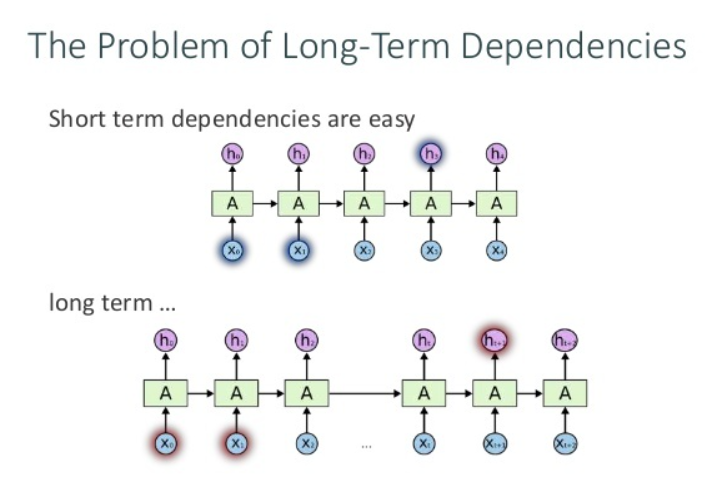

이 문제의 원인은 데이터의 시퀀스가 길어지면 RNN의 역전파(Backpropagation) 알고리즘인 BPTT(Backpropagation Through Time)가 장기 의존성 학습에 어려움이 생긴다는 점이다. 즉, 가중치를 업데이트 하는 과정에서 1보다 작은 값들이 계속 곱해지면서 기울기가 사라지는 기울기 소실 문제(Vanishing Gradient Problem)가 발생하기 때문이다.
 
기울기가 사라지게 되면 과거 정보가 현재의 학습에 영향을 미치지 못하게 되면서 RNN의 성능이 크게 떨어지기에 RNN의 문제점을 해결하기 위해서 RNN이 변형된 알고리즘들이 나왔는데, 대표적으로 아래 소개할 LSTM이 있다.

### **LSTM(장단기 메모리: Long Short-Term Memory)**

LSTM은 RNN을 보완한 가장 성공적인 모델로 평가 받고 있다. 이 모델은 기본 RNN에 비해서 데이터의 장기간 의존성을 감지할 수 있다.
 
LSTM은 장기 의존성을 해결하기 위하여 셀 상태(Cell state)라는 구조를 만들었다. 데이터를 계산하는 위치에 입력(Input), 망각(Forget), 출력(Output) 게이트 3가지가 더해져 각 상태 값을 메모리 공간 셀에 저장하고, 데이터를 접하는 게이트 부분을 조정하여 불필요한 연산과 오차를 줄여 장기 의존성 문제를 일정 부분 해결한다.

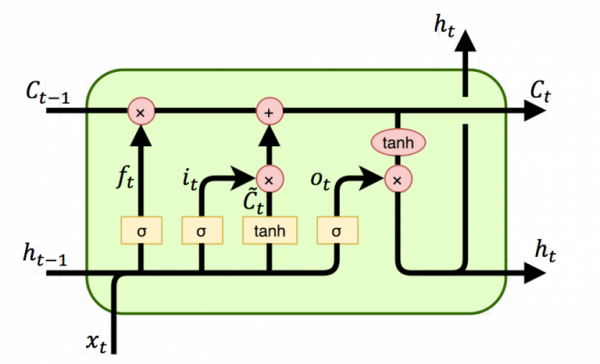

LSTM에는 다음과 같은 Layer들이 있다.

- Forget Gate Layer: 과거의 정보를 버릴지 말지를 결정하는 게이트로, 시그모이드 함수를 통해 0~1 사이의 값을 출력한다
 
- Input Gate Layer: 새로운 정보가 Cell State에 저장이 될지 결정하는 게이트이다.
 
- Output Gate Layer: 상태를 바탕으로 시그모이드 층에 입력 데이터를 넣어 상태의 어느 부분을 출력으로 내보낼지 결정하는 게이트이다.
 
- Update Cell State: forget gate와 input gate에서 출력된 값들을 다음 cell state로 업데이트한다.


# **3. 실험**


In [ ]:
import numpy as np
import random
import os
import math

import natsort
from glob import glob
import pandas as pd
import cv2
from tqdm.auto import tqdm

import tensorflow as tf
from tensorflow.keras import layers
import keras
from tensorflow.keras import regularizers

from itertools import groupby

## **3-1. 실험 환경**

제공되는 데이터 크게 이미지 데이터(image data)와 환경 데이터(meta data)로 나뉘는데, 데이터 셋의 전체적인 구조는 아래와 같다.

train [Folder] : 학습용 청경채 데이터셋 (1592장)

	│	├ CASE01 : 각 케이스 별 데이터

	│	│	├ image : 이미지 데이터

	│	│	├ meta : 환경 데이터

	│	│		└ 촬영 된 시각으로부터 1일간 1분 간격으로 측정된 환경정보 데이터

	│	│	└ label.csv :

	│	│		└ img_name : 해당 이미지 파일명

	│	│		└ leaf_weight : 해당 이미지가 촬영된 시점으로부터 1일 후의 잎 면적 (중량)

	│	│

	│	├ CASE02

	│	├ CASE03

	│	└ ...

 test [Folder] : 테스트용 청경채 데이터셋 (460장)

	│	├ image : 이미지 데이터

	│	├ meta : 환경 데이터

	│		└ 촬영 된 시각으로부터 1일간 1분 간격으로 측정된 환경정보 데이터

	│

sample_submission.csv

	└ img_name : 해당 이미지 파일명

	└ leaf_weight : 해당 이미지가 촬영된 시점으로부터 1일 후의 잎 면적 (중량)

Train 데이터 안의 사진 데이터(image data)에는 75개의 case와 총 1592개의 청경채 사진이 있고, Test 데이터 안에는 총 460개의 청경채 사진이 있다.

청경채 데이터 예시 이미지(Train > CASE07)

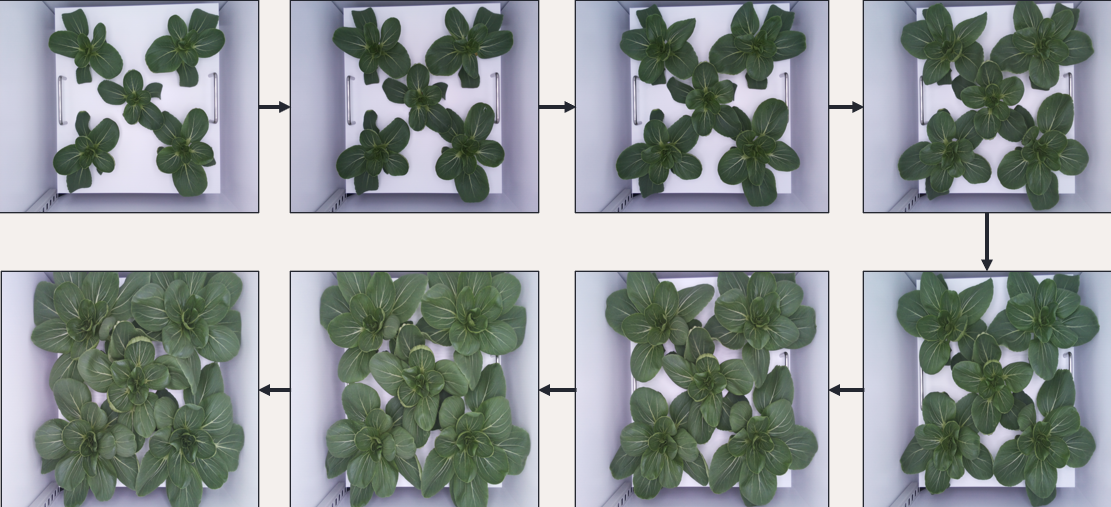

환경 데이터(meta data)는 촬영된 시각으로부터 1일간 1분 간격으로 측정된 환경정보 데이터로 시간, 내부온도관측치, 외부온도관측치, 내부습도관측치, 외부습도관측치, CO2관측치, EC관측치, 최근분무량, 화이트 LED동작강도, 레드 LED동작강도, 블루 LED동작강도, 냉방온도, 냉방부하, 난방온도, 난방부하, 총추정광량, 백색광추정광량, 적색광추정광량, 청색광추정광량의 19개의 환경 feature이 있다.

Label.csv 파일에는 해당 이미지 파일명(img_name)과 해당 이미지가 촬영된 시점으로부터 1일 후의 잎 면적(leaf_weight)이 포함되어있다. 

결론적으로, 이미지 데이터와 환경 데이터를 사용하여 테스트용 청경채 데이터셋의 청경채 이미지에 대해 잎 면적(leaf_weight)을 예측하는 것이 이 대회의 목표이다.

### 데이터 가져오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dpath = "/content/drive/MyDrive/open/"

In [ ]:
train_csv_files = sorted(glob(dpath + "/train/*/meta/*.csv"))

In [ ]:
results = []
for train_csv_file in tqdm(train_csv_files):
    df_csv = pd.read_csv(train_csv_file)
    image = os.path.split(train_csv_file)[1].split(".")[0]
    df_csv["image"] = image
    results.append(df_csv)

  0%|          | 0/1592 [00:00<?, ?it/s]

In [ ]:
features = ['내부온도관측치', '외부온도관측치', '내부습도관측치', '외부습도관측치', 'CO2관측치', 'EC관측치',
       '일간누적분무량', '화이트 LED동작강도', '레드 LED동작강도', '블루 LED동작강도', '냉방온도', '냉방부하',
       '난방온도', '난방부하', '총추정광량', '백색광추정광량', '적색광추정광량', '청색광추정광량']

In [ ]:
def get_train_data(data_dir):
    img_path_list = []
    label_list = []
    for case_name in natsort.natsorted(os.listdir(data_dir)):
        current_path = os.path.join(data_dir, case_name)
        if os.path.isdir(current_path):
            
            img_path_list.extend(natsort.natsorted(glob(os.path.join(current_path, 'image', '*.jpg'))))
            img_path_list.extend(natsort.natsorted(glob(os.path.join(current_path, 'image', '*.png'))))
            
            label_df = pd.read_csv(current_path+'/label.csv')
            label_list.extend(label_df['leaf_weight'])
                
    return img_path_list, label_list

def get_test_data(data_dir):
    img_path_list = glob(os.path.join(data_dir, 'image', '*.jpg'))
    img_path_list.extend(glob(os.path.join(data_dir, 'image', '*.png')))
    img_path_list.sort(key=lambda x:int(x.split('/')[-1].split('.')[0]))
    return img_path_list

데이터를 가져오는 함수를 train 데이터, test 데이터 각각 get_train_data, get_test_data로 정의해주었다.

In [ ]:
all_img_path, all_label = get_train_data(dpath + 'train')
test_img_path = get_test_data(dpath + 'test')

In [ ]:
random.Random(1974).shuffle(all_img_path) 
random.Random(1974).shuffle(all_label)

label와 image를 맞추기 위해 고정된 seed로 shuffle 해주었다.

In [ ]:
results

[                    시간  내부온도관측치    외부온도관측치    내부습도관측치  외부습도관측치  CO2관측치  \
 0     2021-05-07 02:46     18.6  41.500000  77.599998      NaN   582.0   
 1     2021-05-07 02:47     18.6  41.500000  77.699997      0.0   585.0   
 2     2021-05-07 02:48     18.6  41.299999  77.800003      0.0   587.0   
 3     2021-05-07 02:49     18.5  41.099998  77.800003      0.0   584.0   
 4     2021-05-07 02:50     18.6  41.200001  77.800003      0.0   583.0   
 ...                ...      ...        ...        ...      ...     ...   
 1435  2021-05-08 02:41     17.4  48.000000  69.500000      0.0   568.0   
 1436  2021-05-08 02:42     17.4  48.000000  70.099998      0.0   572.0   
 1437  2021-05-08 02:43     17.4  48.000000  70.599998      0.0   574.0   
 1438  2021-05-08 02:44     17.4  48.000000  71.599998      0.0   574.0   
 1439  2021-05-08 02:45     17.5  47.900002  72.500000      NaN   578.0   
 
           EC관측치  최근분무량  화이트 LED동작강도  레드 LED동작강도  블루 LED동작강도  냉방온도  냉방부하  난방온도  \
 0     18.600000

results는 리스트로 길이가 1592이다. 

results 리스트의 하나의 요소는 아래와 같이 특정 날짜 구간의 데이터가 존재한다. 

(20개의 columns = 19 features + 1 img_name)
- results[0]: 2021-05-07 02:46 - 2021-05-08 02:45
- results[1591]: 2021-05-29 02:46 - 2021-05-30 02:45
 

그렇지만, results index에 따라 날짜가 순서대로 배열되어 있지 않다. 즉 results[0]과 results[1591] 사이에 3, 4, 6월 데이터가 섞여있다.

### EDA 

In [ ]:
results[0].head()

시간  내부온도관측치    외부온도관측치    내부습도관측치  외부습도관측치  CO2관측치  \
0  2021-05-07 02:46     18.6  41.500000  77.599998      NaN   582.0   
1  2021-05-07 02:47     18.6  41.500000  77.699997      0.0   585.0   
2  2021-05-07 02:48     18.6  41.299999  77.800003      0.0   587.0   
3  2021-05-07 02:49     18.5  41.099998  77.800003      0.0   584.0   
4  2021-05-07 02:50     18.6  41.200001  77.800003      0.0   583.0   

       EC관측치  최근분무량  화이트 LED동작강도  레드 LED동작강도  블루 LED동작강도  냉방온도  냉방부하  난방온도  \
0  18.600000    0.0        201.0       201.0       201.0  14.0   0.0  15.0   
1  18.799999    0.0        201.0       201.0         0.0  14.0   0.0  15.0   
2  18.700001    0.0        201.0       201.0         NaN  14.0   0.0  15.0   
3  18.799999    0.0        201.0       201.0         0.0  14.0   0.0  15.0   
4  19.100000    0.0        201.0       201.0         0.0  14.0   0.0  15.0   

        난방부하  총추정광량  백색광추정광량  적색광추정광량  청색광추정광량      image  
0  13.000002    0.0      0.0      0.0      NaN  CASE01_01  
1  13.000002    0.0      0.0      0.0      NaN  CASE01_01  
2  13.000002    0.0      0.0      0.0      NaN  CASE01_01  
3  12.500000    0.0      0.0      0.0      NaN  CASE01_01  
4  13.000002    0.0      0.0      0.0      NaN  CASE01_01

In [ ]:
results[0].tail()

시간  내부온도관측치    외부온도관측치    내부습도관측치  외부습도관측치  CO2관측치  EC관측치  \
1435  2021-05-08 02:41     17.4  48.000000  69.500000      0.0   568.0   15.7   
1436  2021-05-08 02:42     17.4  48.000000  70.099998      0.0   572.0   15.6   
1437  2021-05-08 02:43     17.4  48.000000  70.599998      0.0   574.0   15.6   
1438  2021-05-08 02:44     17.4  48.000000  71.599998      0.0   574.0   15.6   
1439  2021-05-08 02:45     17.5  47.900002  72.500000      NaN   578.0   15.6   

      최근분무량  화이트 LED동작강도  레드 LED동작강도  블루 LED동작강도  냉방온도  냉방부하  난방온도      난방부하  \
1435    0.0        201.0       201.0         0.0  14.0   0.0  15.0  6.999998   
1436    0.0        201.0       201.0         NaN  14.0   0.0  15.0  6.999998   
1437    0.0          NaN       201.0         0.0  14.0   0.0  15.0  6.999998   
1438    0.0        201.0       201.0         0.0  14.0   0.0  15.0  6.999998   
1439    0.0        201.0       201.0         NaN  14.0   0.0  15.0  7.500000   

      총추정광량  백색광추정광량  적색광추정광량  청색광추정광량      image  
1435    0.0      0.0      0.0      NaN  CASE01_01  
1436    0.0      0.0      0.0      NaN  CASE01_01  
1437    0.0      0.0      0.0      NaN  CASE01_01  
1438    0.0      0.0      0.0      NaN  CASE01_01  
1439    0.0      0.0      0.0      NaN  CASE01_01


results[0] 는 5월 7일 오전 2:46 부터 5월 8일 오전 2:45까지의 데이터이다. 

In [ ]:
results[0].columns

Index(['시간', '내부온도관측치', '외부온도관측치', '내부습도관측치', '외부습도관측치', 'CO2관측치', 'EC관측치',
       '최근분무량', '화이트 LED동작강도', '레드 LED동작강도', '블루 LED동작강도', '냉방온도', '냉방부하',
       '난방온도', '난방부하', '총추정광량', '백색광추정광량', '적색광추정광량', '청색광추정광량', 'image'],
      dtype='object')

In [ ]:
results[0]['image']

0       CASE01_01
1       CASE01_01
2       CASE01_01
3       CASE01_01
4       CASE01_01
          ...    
1435    CASE01_01
1436    CASE01_01
1437    CASE01_01
1438    CASE01_01
1439    CASE01_01
Name: image, Length: 1440, dtype: object

In [ ]:
results[0].dtypes 

시간              object
내부온도관측치        float64
외부온도관측치        float64
내부습도관측치        float64
외부습도관측치        float64
CO2관측치         float64
EC관측치          float64
최근분무량          float64
화이트 LED동작강도    float64
레드 LED동작강도     float64
블루 LED동작강도     float64
냉방온도           float64
냉방부하           float64
난방온도           float64
난방부하           float64
총추정광량          float64
백색광추정광량        float64
적색광추정광량        float64
청색광추정광량        float64
image           object
dtype: object

In [ ]:
results[0].describe()

내부온도관측치      외부온도관측치      내부습도관측치      외부습도관측치       CO2관측치  \
count  1440.000000  1440.000000  1440.000000  1149.000000  1440.000000   
mean     22.236181    43.868542    77.740695     4.898172   487.226389   
std       4.356662     8.601366     2.455352    31.006084    86.073244   
min      17.400000    28.799999    64.000000     0.000000   360.000000   
25%      18.100000    37.500000    76.099998     0.000000   399.000000   
50%      20.250000    43.300001    77.500000     0.000000   494.500000   
75%      27.000000    47.900002    78.400002     0.000000   577.000000   
max      29.400000    66.400002    87.800003   201.000000   598.000000   

             EC관측치   최근분무량  화이트 LED동작강도  레드 LED동작강도  블루 LED동작강도         냉방온도  \
count  1440.000000  1440.0  1387.000000      1389.0  860.000000  1416.000000   
mean     19.594792     0.0   200.710166       201.0    0.233721    17.417129   
std       2.221090     0.0     7.629852         0.0    6.854043     4.385158   
min      15.600000     0.0     0.000000       201.0    0.000000    14.000000   
25%      18.100000     0.0   201.000000       201.0    0.000000    14.000000   
50%      19.200001     0.0   201.000000       201.0    0.000000    14.003197   
75%      21.700001     0.0   201.000000       201.0    0.000000    23.982416   
max      23.900000     0.0   201.000000       201.0  201.000000    24.000000   

              냉방부하         난방온도         난방부하        총추정광량      백색광추정광량  \
count  1416.000000  1416.000000  1416.000000  1416.000000  1416.000000   
mean    179.488256    18.854662    10.227934   145.968975    12.396976   
std     181.201911     4.802651     6.791719   146.336379    14.057553   
min       0.000000    15.000000     0.000000     0.000000     0.000000   
25%       0.000000    15.000000     6.000004     0.000000     0.000000   
50%     111.769200    15.428947    10.500002    97.464150     6.619200   
75%     376.174300    25.981440    12.085309   309.410000    23.167200   
max     401.944700    26.000000    30.296585   309.410000    47.989200   

           적색광추정광량  청색광추정광량  
count  1416.000000      0.0  
mean     21.122305      NaN  
std      24.016685      NaN  
min       0.000000      NaN  
25%       0.000000      NaN  
50%       6.266000      NaN  
75%      48.561500      NaN  
max      61.093500      NaN

In [ ]:
results[0].corr() 

내부온도관측치   외부온도관측치   내부습도관측치   외부습도관측치    CO2관측치     EC관측치  \
내부온도관측치      1.000000  0.150986 -0.412573  0.063500 -0.947329  0.833682   
외부온도관측치      0.150986  1.000000 -0.056205  0.020843 -0.118868 -0.168191   
내부습도관측치     -0.412573 -0.056205  1.000000 -0.023895  0.473751 -0.441755   
외부습도관측치      0.063500  0.020843 -0.023895  1.000000 -0.063560  0.060514   
CO2관측치      -0.947329 -0.118868  0.473751 -0.063560  1.000000 -0.860914   
EC관측치        0.833682 -0.168191 -0.441755  0.060514 -0.860914  1.000000   
최근분무량             NaN       NaN       NaN       NaN       NaN       NaN   
화이트 LED동작강도 -0.014525 -0.028211  0.006889  0.006604  0.016900 -0.001010   
레드 LED동작강도        NaN       NaN       NaN       NaN       NaN       NaN   
블루 LED동작강도  -0.028600 -0.009331 -0.001864       NaN  0.037571 -0.015434   
냉방온도         0.947067  0.303452 -0.350529  0.062150 -0.830905  0.685229   
냉방부하         0.945482  0.140241 -0.473172  0.063917 -0.955268  0.844557   
난방온도         0.957293  0.290813 -0.362830  0.062764 -0.850133  0.703154   
난방부하        -0.428203 -0.512786  0.076975 -0.034323  0.210302 -0.079945   
총추정광량        0.932425  0.169803 -0.480125  0.064636 -0.950405  0.849522   
백색광추정광량      0.817472 -0.167557 -0.414956  0.046735 -0.868024  0.743328   
적색광추정광량      0.973651  0.121536 -0.401665  0.061004 -0.908338  0.760720   
청색광추정광량           NaN       NaN       NaN       NaN       NaN       NaN   

             최근분무량  화이트 LED동작강도  레드 LED동작강도  블루 LED동작강도      냉방온도      냉방부하  \
내부온도관측치        NaN    -0.014525         NaN   -0.028600  0.947067  0.945482   
외부온도관측치        NaN    -0.028211         NaN   -0.009331  0.303452  0.140241   
내부습도관측치        NaN     0.006889         NaN   -0.001864 -0.350529 -0.473172   
외부습도관측치        NaN     0.006604         NaN         NaN  0.062150  0.063917   
CO2관측치         NaN     0.016900         NaN    0.037571 -0.830905 -0.955268   
EC관측치          NaN    -0.001010         NaN   -0.015434  0.685229  0.844557   
최근분무량          NaN          NaN         NaN         NaN       NaN       NaN   
화이트 LED동작강도    NaN     1.000000         NaN         NaN -0.013872 -0.002855   
레드 LED동작강도     NaN          NaN         NaN         NaN       NaN       NaN   
블루 LED동작강도     NaN          NaN         NaN    1.000000 -0.027036 -0.034254   
냉방온도           NaN    -0.013872         NaN   -0.027036  1.000000  0.869734   
냉방부하           NaN    -0.002855         NaN   -0.034254  0.869734  1.000000   
난방온도           NaN    -0.013168         NaN   -0.027831  0.999116  0.888445   
난방부하           NaN    -0.004307         NaN    0.014320 -0.687946 -0.357123   
총추정광량          NaN    -0.002302         NaN   -0.034494  0.856381  0.997409   
백색광추정광량        NaN     0.002222         NaN   -0.030524  0.666322  0.888423   
적색광추정광량        NaN    -0.008812         NaN   -0.030456  0.953953  0.947496   
청색광추정광량        NaN          NaN         NaN         NaN       NaN       NaN   

                 난방온도      난방부하     총추정광량   백색광추정광량   적색광추정광량  청색광추정광량  
내부온도관측치      0.957293 -0.428203  0.932425  0.817472  0.973651      NaN  
외부온도관측치      0.290813 -0.512786  0.169803 -0.167557  0.121536      NaN  
내부습도관측치     -0.362830  0.076975 -0.480125 -0.414956 -0.401665      NaN  
외부습도관측치      0.062764 -0.034323  0.064636  0.046735  0.061004      NaN  
CO2관측치      -0.850133  0.210302 -0.950405 -0.868024 -0.908338      NaN  
EC관측치        0.703154 -0.079945  0.849522  0.743328  0.760720      NaN  
최근분무량             NaN       NaN       NaN       NaN       NaN      NaN  
화이트 LED동작강도 -0.013168 -0.004307 -0.002302  0.002222 -0.008812      NaN  
레드 LED동작강도        NaN       NaN       NaN       NaN       NaN      NaN  
블루 LED동작강도  -0.027831  0.014320 -0.034494 -0.030524 -0.030456      NaN  
냉방온도         0.999116 -0.687946  0.856381  0.666322  0.953953      NaN  
냉방부하         0.888445 -0.357123  0.997409  0.888423  0.947496      NaN  
난방온도         1.000000 -0.665223  0.875060  0.695276  0.964372      NaN  
난방부하        -0.665223  1.000000 -0.350711 -0.076984 -0.512454   

### 데이터 전처리

In [ ]:
random.Random(1974).shuffle(results) 

전처리를 하기 전, results를 고정 seed로 shuffle 해주었다.

#### 결측치 확인하기

In [ ]:
results[0].isnull().sum()

시간              0
내부온도관측치         2
외부온도관측치         0
내부습도관측치         0
외부습도관측치         0
CO2관측치          0
EC관측치           0
최근분무량           0
화이트 LED동작강도    80
레드 LED동작강도     79
블루 LED동작강도     82
냉방온도           24
냉방부하           27
난방온도           24
난방부하           27
총추정광량          24
백색광추정광량        24
적색광추정광량        24
청색광추정광량        24
image           0
dtype: int64

열별 결측치 수를 확인하였는데, 청색광추정광량은 전부 결측값인 것을 확인할 수 있었다.

아래 코드로 데이터 길이와 결측치 개수를 확인해보았다.

In [ ]:
print(results[0].info()) 
print(results[9].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시간           1440 non-null   object 
 1   내부온도관측치      1440 non-null   float64
 2   외부온도관측치      1440 non-null   float64
 3   내부습도관측치      1440 non-null   float64
 4   외부습도관측치      1149 non-null   float64
 5   CO2관측치       1440 non-null   float64
 6   EC관측치        1440 non-null   float64
 7   최근분무량        1440 non-null   float64
 8   화이트 LED동작강도  1387 non-null   float64
 9   레드 LED동작강도   1389 non-null   float64
 10  블루 LED동작강도   860 non-null    float64
 11  냉방온도         1416 non-null   float64
 12  냉방부하         1416 non-null   float64
 13  난방온도         1416 non-null   float64
 14  난방부하         1416 non-null   float64
 15  총추정광량        1416 non-null   float64
 16  백색광추정광량      1416 non-null   float64
 17  적색광추정광량      1416 non-null   float64
 18  청색광추정광량      0 non-null      float64
 19  image 

#### 결측치 처리

In [ ]:
results[1307]

시간    내부온도관측치    외부온도관측치    내부습도관측치    외부습도관측치  CO2관측치  \
0     2021-03-27 08:59  28.299999  29.600000  32.299999  20.400000   447.0   
1     2021-03-27 09:00  28.299999  29.600000  32.299999  20.400000   449.0   
2     2021-03-27 09:01  28.400000  29.600000  32.299999  20.400000   449.0   
3     2021-03-27 09:02  28.400000  29.700001  32.299999  20.400000   448.0   
4     2021-03-27 09:03  28.400000  29.700001  32.200001  20.400000   450.0   
...                ...        ...        ...        ...        ...     ...   
1435  2021-03-28 08:54  34.099998  34.799999  38.500000  25.299999   396.0   
1436  2021-03-28 08:55  34.099998  34.799999  38.500000  25.299999   400.0   
1437  2021-03-28 08:56  34.099998  34.799999  38.500000  25.200001   400.0   
1438  2021-03-28 08:57  34.099998  34.799999  38.500000  25.200001   398.0   
1439  2021-03-28 08:58  34.099998  34.799999  38.400002  25.100000   396.0   

         EC관측치  최근분무량  화이트 LED동작강도  레드 LED동작강도  블루 LED동작강도  냉방온도       냉방부하  \
0     1.541214  769.0        100.0        10.0        19.0  20.0  41.499996   
1     1.541214  769.0        100.0        10.0        19.0  20.0  41.499996   
2     1.539383  769.0        100.0        10.0        19.0  20.0  41.999998   
3     1.542130  769.0        100.0         NaN         NaN  20.0  41.999998   
4     1.543046  769.0        100.0        10.0        20.0  20.0  41.999998   
...        ...    ...          ...         ...         ...   ...        ...   
1435  1.507329  769.0          NaN         NaN        18.0  20.0  70.499992   
1436  1.503666  769.0        100.0        10.0        18.0  20.0  70.499992   
1437  1.510992  769.0        100.0        10.0        18.0  20.0  70.499992   
1438  1.509161  769.0        100.0        10.0        19.0  20.0  70.499992   
1439  1.505498  769.0        100.0        10.0        19.0  20.0  70.499992   

      난방온도  난방부하     총추정광량  백색광추정광량  적색광추정광량  청색광추정광량      image  
0     19.0   0.0  355.7215   309.41   16.548  29.7635  CASE62_01  
1     19.0   0.0  355.7215   309.41   16.548  29.7635  CASE62_01  
2     19.0   0.0  355.7215   309.41   16.548  29.7635  CASE62_01  
3     19.0   0.0  355.7215   309.41   16.548  29.7635  CASE62_01  
4     19.0   0.0  357.2880   309.41   16.548  31.3300  CASE62_01  
...    ...   ...       ...      ...      ...      ...        ...  
1435  19.0   0.0  354.1550   309.41   16.548  28.1970  CASE62_01  
1436  19.0   0.0  354.1550   309.41   16.548  28.1970  CASE62_01  
1437  19.0   0.0  354.1550   309.41   16.548  28.1970  CASE62_01  
1438  19.0   0.0  355.7215   309.41   16.548  29.7635  CASE62_01  
1439  19.0   0.0  355.7215   309.41   16.548  29.7635  CASE62_01  

[1440 rows x 20 columns]

In [ ]:
for i in range(len(results)):
    results[i]["최근분무량"][results[i]["최근분무량"] > 30000] = np.NAN 
    results[i]["최근분무량"] = results[i]["최근분무량"].fillna(method='bfill', limit=1)
    results[i]["최근분무량"] = results[i]["최근분무량"].fillna(method='ffill', limit=1)
    results[i] = results[i].interpolate()
    results[i].fillna(method='bfill', inplace=True)
    results[i].fillna(method='ffill', inplace=True)
  

    water = results[i]['최근분무량'].round(2).tolist()
    if np.mean(water) > 1000:
        nums = [list(v) for k, v in groupby(water, key = lambda x: x != 0) if k != 0]
        if len(nums) == 2:
            cumulative = nums[0][-1] - nums[0][0] + nums[1][-1]
        else:
            cumulative = nums[0][-1] - nums[0][0]
            
    elif 1000 > np.mean(water) > 0:
        nums = [key for key, _group in groupby(water)]
        cumulative = sum(nums[1:])
    else:
        cumulative = 0

    results[i]['최근분무량'] = cumulative

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1. 시계열 데이터를 보간하기 위해 interpolate() 을 이용하여 대부분의 결측치를 처리하였다.
- 이후 잔여 결측치들은 bfill과 ffill을 이용하여 마저 채워지도록 하였다.

2. '최근분무량' feature에 대하여, CASE10~14는 '최근분무량'이 아닌 '일간누적분무량'을 나타내기 때문에 모든 '최근분무량' 값들을 '일간누적분무량'값으로 바꿔주었다.


In [ ]:
for i in range(len(results)):
    results[i] = results[i].rename(columns = {'최근분무량' : '일간누적분무량'})

따라서 column name '최근분무량'을 '일간누적분무량'으로 바꾸어주었다.

In [ ]:
arr = []
for i in range(len(results)):
    p = results[i]['일간누적분무량'].round(2).max()
    arr.append(p)

np.max(arr) 

14565.99

최대누적분무량('일간누적분무량' 열의 최대값)은 14565.99이다.

In [ ]:
results[0].i제snull().sum()

시간                0
내부온도관측치           0
외부온도관측치           0
내부습도관측치           0
외부습도관측치           0
CO2관측치            0
EC관측치             0
일간누적분무량           0
화이트 LED동작강도       0
레드 LED동작강도        0
블루 LED동작강도        0
냉방온도              0
냉방부하              0
난방온도              0
난방부하              0
총추정광량             0
백색광추정광량           0
적색광추정광량           0
청색광추정광량        1440
image             0
dtype: int64

위에서 결측치를 처리하고 하나의 feature를 다시 계산한 후에 결측치를 확인하였다.


- '청색광추정광량'을 제외한 모든 feature의 결측치가 없음을 확인할 수 있다.

In [ ]:
for i in range(len(results)):
    results[i][features[-1]] = results[i][features[-4]] - results[i][features[-3]] - results[i][features[-2]]

따라서, '청색광추정광량'에는 결측치만 있기 때문에 
```
청색광추정광량 = 총추정광량 - 백색광추정광량 - 적색광추정광량
```
해당 공식을 사용하여 결측치를 채워주었다.

In [ ]:
results[10].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시간           1440 non-null   object 
 1   내부온도관측치      1440 non-null   float64
 2   외부온도관측치      1440 non-null   float64
 3   내부습도관측치      1440 non-null   float64
 4   외부습도관측치      1440 non-null   float64
 5   CO2관측치       1440 non-null   float64
 6   EC관측치        1440 non-null   float64
 7   일간누적분무량      1440 non-null   float64
 8   화이트 LED동작강도  1440 non-null   float64
 9   레드 LED동작강도   1440 non-null   float64
 10  블루 LED동작강도   1440 non-null   float64
 11  냉방온도         1440 non-null   float64
 12  냉방부하         1440 non-null   float64
 13  난방온도         1440 non-null   float64
 14  난방부하         1440 non-null   float64
 15  총추정광량        1440 non-null   float64
 16  백색광추정광량      1440 non-null   float64
 17  적색광추정광량      1440 non-null   float64
 18  청색광추정광량      1440 non-null   float64
 19  image 

이제 '청색광추정광량'의 결측치가 없는 것을 확인할 수 있다.

In [ ]:
results[4].head()

시간  내부온도관측치  외부온도관측치  내부습도관측치  외부습도관측치  CO2관측치  EC관측치  \
0  2021-05-25 02:46      NaN      NaN      NaN      NaN     NaN    NaN   
1  2021-05-25 02:47      NaN      NaN      NaN      NaN     NaN    NaN   
2  2021-05-25 02:48      NaN      NaN      NaN      NaN     NaN    NaN   
3  2021-05-25 02:49      NaN      NaN      NaN      NaN     NaN    NaN   
4  2021-05-25 02:50      NaN      NaN      NaN      NaN     NaN    NaN   

   일간누적분무량  화이트 LED동작강도  레드 LED동작강도  블루 LED동작강도  냉방온도  냉방부하  난방온도  난방부하  \
0        0          NaN         NaN         NaN   NaN   NaN   NaN   NaN   
1        0          NaN         NaN         NaN   NaN   NaN   NaN   NaN   
2        0          NaN         NaN         NaN   NaN   NaN   NaN   NaN   
3        0          NaN         NaN         NaN   NaN   NaN   NaN   NaN   
4        0          NaN         NaN         NaN   NaN   NaN   NaN   NaN   

   총추정광량  백색광추정광량  적색광추정광량  청색광추정광량      image  
0    NaN      NaN      NaN      NaN  CASE59_29  
1    NaN      NaN      NaN      NaN  CASE59_29  
2    NaN      NaN      NaN      NaN  CASE59_29  
3    NaN      NaN      NaN      NaN  CASE59_29  
4    NaN      NaN      NaN      NaN  CASE59_29

results[4]를 head()로 뽑아봤을때 모든 데이터가 결측치인것을 확인할 수 있었다.

In [ ]:
null_data = []
null_data_N = []

for i in range(len(results)):
    if results[i][results[i][features[1]].isnull()].shape[0] != 0:
        null_data.append(results[i]["image"][0])
        null_data_N.append(i)

null_data[:5]

['CASE59_29', 'CASE72_05', 'CASE26_05', 'CASE23_05', 'CASE31_08']

In [ ]:
len(null_data) 

283

In [ ]:
non_null_data_N = []

for i in range(len(results)):
    if results[i][results[i]["냉방온도"].isnull()].shape[0] == 0:
        non_null_data_N.append(i)

In [ ]:
len(non_null_data_N)

1309

결측치가 없는 데이터를 가져온 결과, 1309개가 있다.

이를 통해 데이터가 전혀 없는 경우를 빼고 학습을 시도하였다.

In [ ]:
train_csv_pre = []

for i in range(len(results)):
    train_csv_ing = results[i][features].copy()
    train_csv_pre.append(train_csv_ing)

image와 시간 열(전처리 외 필요 없는 열)을 제외한 다른 데이터 리스트를 만들어주었다.

In [ ]:
train_csv = []

for i in range(len(non_null_data_N)):
    train_csv.append(train_csv_pre[non_null_data_N[i]])

In [ ]:
len(train_csv)

1309

In [ ]:
corr = []

for i in range(len(train_csv)):
    corr.append(train_csv[i].corr())

In [ ]:
corr[0].style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


랜덤으로 뽑은 데이터의 상관관계 분석 결과 화이트 LED, 레드 LED, 블루 LED 동작강도가 다른 변수들과 상관관계가 높아 제거하였고, 총 추정광량 또한 **['백색광추정광량', '적색광추정광량', '청색광추정광량']** 의 세 변수와 밀접한 관련이 있어 제거해주었다.


In [ ]:
features_final = ['내부온도관측치', '외부온도관측치', '내부습도관측치', '외부습도관측치', 'CO2관측치', 'EC관측치',
       '냉방온도', '냉방부하',
       '난방온도', '난방부하', '백색광추정광량', '적색광추정광량', '청색광추정광량'] 

In [ ]:
len(features_final)

13

In [ ]:
train_csv_final = []

for i in range(len(non_null_data_N)):
    train_csv_ing_final = train_csv[i][features_final].copy()
    train_csv_final.append(train_csv_ing_final)

위의 features_final만 포함한 데이터를 가져왔다.

In [ ]:
min_val = []
max_val = []

for i in range(len(train_csv_final)):
    max_val_ing, min_val_ing = train_csv_final[i].max(), train_csv_final[i].min()
    max_val.append(max_val_ing)
    min_val.append(min_val_ing)
    train_csv_final[i] = (train_csv_final[i] - min_val[i]) / (max_val[i] - min_val[i])
    train_csv_final[i] = train_csv_final[i].replace(np.NAN, 0)

Min-Max Scaling을 통해 모든 값들을 0에서 1사이의 값으로 변환해주었다.

In [ ]:
train_csv_final[0]

내부온도관측치   외부온도관측치   내부습도관측치   외부습도관측치    CO2관측치     EC관측치  냉방온도  \
0     0.272727  0.264463  0.722581  0.250951  0.278788  0.924095   1.0   
1     0.284091  0.272727  0.761290  0.247148  0.248485  0.924095   1.0   
2     0.284091  0.289256  0.822581  0.250951  0.218182  0.894968   1.0   
3     0.284091  0.305785  0.319355  0.266160  0.272727  0.733008   1.0   
4     0.306818  0.314050  0.135484  0.224335  0.345455  0.763458   1.0   
...        ...       ...       ...       ...       ...       ...   ...   
1435  0.670455  0.454545  0.264516  0.608365  0.818182  0.614031   1.0   
1436  0.681818  0.446281  0.354839  0.615970  0.836364  0.626467   1.0   
1437  0.681818  0.438016  0.490323  0.619772  0.806061  0.638903   1.0   
1438  0.681818  0.438016  0.541935  0.627376  0.787879  0.650173   1.0   
1439  0.704545  0.429752  0.590322  0.634981  0.751515  0.672548   1.0   

          냉방부하  난방온도      난방부하  백색광추정광량  적색광추정광량  청색광추정광량  
0     0.000000   1.0  1.000000      1.0      1.0      1.0  
1     0.000000   1.0  0.799999      1.0      1.0      1.0  
2     0.000000   1.0  0.799999      1.0      1.0      1.0  
3     0.000000   1.0  0.799999      1.0      1.0      1.0  
4     0.000000   1.0  0.400002      1.0      1.0      1.0  
...        ...   ...       ...      ...      ...      ...  
1435  0.215054   1.0  0.000000      1.0      1.0      1.0  
1436  0.225807   1.0  0.000000      1.0      1.0      1.0  
1437  0.225807   1.0  0.000000      1.0      1.0      1.0  
1438  0.236559   1.0  0.000000      1.0      1.0      1.0  
1439  0.247312   1.0  0.000000      1.0      1.0      1.0  

[1440 rows x 13 columns]

In [ ]:
csv_label = []

for i in range(len(non_null_data_N)):
    csv_label.append(all_label[non_null_data_N[i]])

### 훈련 / 검증 데이터로 나누기

모형에 직접 훈련할 데이터와 학습시키지 않고 모형을 결정하기 위한 검증 데이터로 나눈다. 일반적으로 나누는 8:2의 비율로 나눴으며, 환경 데이터에서는 완전 결측된 파일을 제거하였기 때문에 label 데이터 또한 따로 만들어준다.

In [ ]:
train_len = int(len(all_img_path)*0.8)

train_img_path = all_img_path[:train_len]
train_label = all_label[:train_len]

vali_img_path = all_img_path[train_len:]
vali_label = all_label[train_len:]

In [ ]:
train_csv_len = int(len(train_csv_final)*0.8)

train_csv_data = train_csv_final[:train_csv_len]
train_csv_label = csv_label[:train_csv_len]

vali_csv_data = train_csv_final[train_csv_len:]
vali_csv_label = csv_label[train_csv_len:]

### 모형 훈련 데이터 만들기


이미지 파일 경로에서 이미지 데이터를 가져오기 위한 함수들이다.

- decode_img(img)는 이미지를 tensor로 변환한 후 해당 데이터를 [0, 1] 범위로 바꾸고 지정된 이미지 크기로 데이터를 조정한다.
- process_path(file_path)는 파일 경로에서 이미지 데이터를 읽어온 후 decode_img 함수를 이용해서 원하는 방향으로 이미지를 변환한다. 

이미 나눠진 훈련과 검증 데이터 경로들에 map을 이용해서 process_path 함수를 적용하고, 적용한 데이터들을 list화 시킨다. 마지막으로 Keras 모형에 사용 가능하도록 이 데이터 셋들을 NumPy 배열로 바꿔준다.

In [ ]:
def decode_img(img):
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return tf.image.resize(img, [img_size, img_size])

In [ ]:
def process_path(file_path):
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img

In [ ]:
img_size = 128

train_images = list(map(process_path, train_img_path))
vali_images = list(map(process_path, vali_img_path))

In [ ]:
train_x = np.array(train_images)
train_y = np.array(train_label)
validation_x = np.array(vali_images)
validation_y = np.array(vali_label)

In [ ]:
train_x_csv = np.array(train_csv_data)
train_y_csv = np.array(train_csv_label)
vali_x_csv = np.array(vali_csv_data)
vali_y_csv = np.array(vali_csv_label)

In [ ]:
train_x.shape

(1273, 128, 128, 3)

In [ ]:
train_x_csv.shape

(1047, 1440, 13)

In [ ]:
train_y.shape

(1273,)

In [ ]:
train_y_csv.shape

(1047,)

### 모형 학습

이미지 데이터(train_x)는 CNN 모형, 환경 데이터(train_x_csv)는 RNN 모형 학습에 이용한다. 

각각 기본 모형을 토대로 모형의 성능을 증가시키기 위해 다양한 방법으로 실험을 하였다.

#### CNN ← 이미지 데이터

1) CNN 기본 모형

Dacon에서 제공한 베이스라인은 PyTorch 형식으로, 수업에서 배운 내용을 적용시키기 위해 Keras 형식으로 다시 작성하였다. 

이 모형의 hyper-parameter는 제공된 베이스라인과 거의 동일하다. 아래 코드에서 볼 수 있듯이 필터의 수는 층이 깊어질수록 늘어나며 모든 층에서 필터의 크기는 3, 활성화 함수는 ReLu를 이용하였다. 또한 padding과 maxpooling을 적용하였다. 잎 면적(중량)을 예측하는 회귀 과제이므로 마지막 출력층에는 활성화 함수가 없다.

In [ ]:
inputs = keras.Input(shape=(128, 128, 3))
x = layers.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1)(x)
model_C = keras.Model(inputs=inputs, outputs=outputs)

아래는 CNN 기본 모형의 구조, complie, callback, fit 방법이다. 최적화는 RmsProp로, 손실함수는 mse, 원래 베이스라인과 비교하기 위해 mae도 추가로 확인해보았다. 

callback은 가장 낮은 검증 데이터의 손실을 낸 훈련을 기준으로 모형을 저장하도록 하였다. 모형을 훈련 시킬 때 또한 베이스라인과 동일하게 epochs는 30, 배치 크기는 8로 맞추었다.

In [ ]:
model_C.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4640  

In [ ]:
model_C.compile(optimizer="rmsprop",
                loss="mse",
                metrics=['mae', 'mse'])

In [ ]:
callbacks_C = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [ ]:
history_C = model_C.fit(train_x, train_y,
                        epochs=30,
                        validation_data=[validation_x, validation_y],
                        batch_size=8,
                        callbacks=callbacks_C)

Epoch 1/30
160/160 [==============================] - 15s 11ms/step - loss: 5008.0049 - mae: 44.2644 - mse: 5008.0049 - val_loss: 2530.8525 - val_mae: 27.9022 - val_mse: 2530.8525
Epoch 2/30
160/160 [==============================] - 1s 7ms/step - loss: 1522.4757 - mae: 21.4399 - mse: 1522.4757 - val_loss: 4471.7271 - val_mae: 41.5697 - val_mse: 4471.7271
Epoch 3/30
160/160 [==============================] - 1s 7ms/step - loss: 1136.9751 - mae: 18.9810 - mse: 1136.9751 - val_loss: 953.2614 - val_mae: 17.3872 - val_mse: 953.2614
Epoch 4/30
160/160 [==============================] - 1s 7ms/step - loss: 1026.6985 - mae: 18.3939 - mse: 1026.6985 - val_loss: 2480.2529 - val_mae: 30.6713 - val_mse: 2480.2529
Epoch 5/30
160/160 [==============================] - 1s 7ms/step - loss: 824.2508 - mae: 16.8405 - mse: 824.2508 - val_loss: 9267.8877 - val_mae: 71.4715 - val_mse: 9267.8877
Epoch 6/30
160/160 [==============================] - 1s 7ms/step - loss: 769.0399 - mae: 15.4636 - mse: 769.039

2) CNN 모형 보완 방법

CNN 기본 모형에서 더 좋은 성능을 내기 위해서 시행한 방법들이다. 첫번째, 데이터 증식을 이용하였다.

뒤집기나 돌리기, 확대/축소로 이미지 데이터의 수를 늘렸으며 입력층 바로 밑에 추가하여 모형을 훈련시킨다. complie과 callback 방법은 동일하다.

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs)
x = layers.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1)(x)
model_C1 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_C1.compile(optimizer="rmsprop",
                loss="mse",
                metrics=['mae', 'mse'])

In [ ]:
history_C1 = model_C1.fit(train_x, train_y,
                        epochs=150,
                        validation_data=[validation_x, validation_y],
                        batch_size=8,
                        callbacks=callbacks_C)

Epoch 1/150
160/160 [==============================] - 4s 11ms/step - loss: 7078.3867 - mae: 56.9206 - mse: 7078.3867 - val_loss: 2209.4705 - val_mae: 31.1704 - val_mse: 2209.4705
Epoch 2/150
160/160 [==============================] - 2s 9ms/step - loss: 2428.2395 - mae: 29.9056 - mse: 2428.2395 - val_loss: 3625.5117 - val_mae: 35.5766 - val_mse: 3625.5117
Epoch 3/150
160/160 [==============================] - 1s 9ms/step - loss: 1871.3798 - mae: 24.6687 - mse: 1871.3798 - val_loss: 2164.0405 - val_mae: 29.4642 - val_mse: 2164.0405
Epoch 4/150
160/160 [==============================] - 1s 9ms/step - loss: 1462.9822 - mae: 21.2809 - mse: 1462.9822 - val_loss: 830.4071 - val_mae: 15.8499 - val_mse: 830.4071
Epoch 5/150
160/160 [==============================] - 2s 10ms/step - loss: 1355.5382 - mae: 20.6297 - mse: 1355.5382 - val_loss: 1738.9890 - val_mae: 25.6961 - val_mse: 1738.9890
Epoch 6/150
160/160 [==============================] - 1s 9ms/step - loss: 1079.0282 - mae: 19.2324 - mse

두번째, 층을 추가한다.

Flatten과 출력층 사이에 합성곱층이 아닌 완전연결층과 드롭아웃 층을 넣어주어 모형을 작성한다. 최적화 방법에서 RmsProp와 Adam 둘 다 실험해보았고 나머지 방법은 기본 모형과 동일하다.

In [ ]:
inputs = keras.Input(shape=(128, 128, 3))
x = layers.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model_C2 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_C2.compile(optimizer="adam",
                loss="mse",
                metrics=['mae', 'mse'])

In [ ]:
history_C2 = model_C2.fit(train_x, train_y,
                        epochs=150,
                        validation_data=[validation_x, validation_y],
                        batch_size=8,
                        callbacks=callbacks_C)

Epoch 1/150
160/160 [==============================] - 4s 17ms/step - loss: 5550.8892 - mae: 46.5758 - mse: 5550.8892 - val_loss: 2915.1484 - val_mae: 28.4701 - val_mse: 2915.1484
Epoch 2/150
160/160 [==============================] - 3s 16ms/step - loss: 1321.5011 - mae: 20.4786 - mse: 1321.5011 - val_loss: 845.2074 - val_mae: 15.7683 - val_mse: 845.2074
Epoch 3/150
160/160 [==============================] - 2s 12ms/step - loss: 1032.0844 - mae: 19.0198 - mse: 1032.0844 - val_loss: 1344.1746 - val_mae: 22.4019 - val_mse: 1344.1746
Epoch 4/150
160/160 [==============================] - 2s 11ms/step - loss: 647.7357 - mae: 14.4037 - mse: 647.7357 - val_loss: 719.8348 - val_mae: 16.0283 - val_mse: 719.8348
Epoch 5/150
160/160 [==============================] - 2s 12ms/step - loss: 597.6375 - mae: 14.7690 - mse: 597.6375 - val_loss: 666.6519 - val_mae: 11.7275 - val_mse: 666.6519
Epoch 6/150
160/160 [==============================] - 1s 8ms/step - loss: 536.7675 - mae: 13.3457 - mse: 536.

세번째, L1, L2 규제를 넣는다. 

드롭아웃처럼 과적합을 방지하기 위해 이용하며, 손실함수에 벌점항을 넣어 가중치 값을 조절하는 방법이다. L1 규제는 가중치 값을 0으로 조절해 노드 간 연결을 줄이고, L2 규제는 가중치 값을 전체적으로 작아지게 한다.

**L1 규제**:
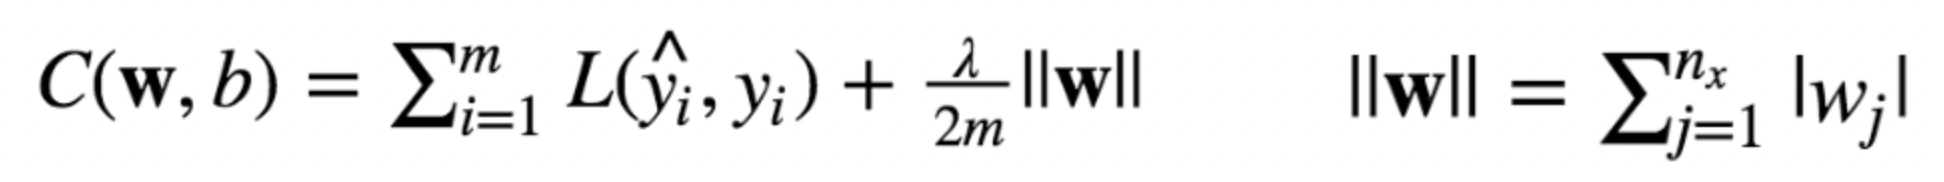

**L2 규제**:
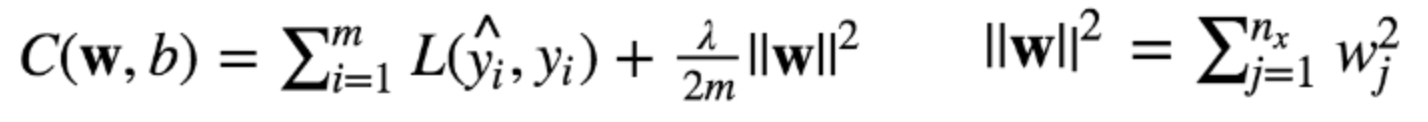


처음에는 L2 규제만 시도하였으며, L1을 추가로 넣어서도 실험해보았다. complie과 callback 방법은 동일하다.

In [ ]:
inputs = keras.Input(shape=(128, 128, 3))
x = layers.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.002))(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.002))(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.002))(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.002))(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model_C3 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
inputs = keras.Input(shape=(128, 128, 3))
x = layers.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu", kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002))(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu", kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002))(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002))(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002))(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model_C4 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_C4.compile(optimizer="rmsprop",
                loss="mse",
                metrics=['mae', 'mse'])

In [ ]:
history_C4 = model_C4.fit(train_x, train_y,
                        epochs=150,
                        validation_data=[validation_x, validation_y],
                        batch_size=8,
                        callbacks=callbacks_C)

Epoch 1/150
160/160 [==============================] - 3s 10ms/step - loss: 7052.9639 - mae: 57.8532 - mse: 7050.6094 - val_loss: 2418.8528 - val_mae: 33.8375 - val_mse: 2416.3564
Epoch 2/150
160/160 [==============================] - 1s 8ms/step - loss: 1678.8435 - mae: 23.7548 - mse: 1676.3026 - val_loss: 1025.0438 - val_mae: 15.7936 - val_mse: 1022.4901
Epoch 3/150
160/160 [==============================] - 1s 8ms/step - loss: 1363.1016 - mae: 20.6218 - mse: 1360.5375 - val_loss: 1054.7405 - val_mae: 16.8934 - val_mse: 1052.1718
Epoch 4/150
160/160 [==============================] - 1s 8ms/step - loss: 1180.7020 - mae: 19.6283 - mse: 1178.1158 - val_loss: 7715.9004 - val_mae: 63.0414 - val_mse: 7713.2852
Epoch 5/150
160/160 [==============================] - 1s 8ms/step - loss: 1044.7314 - mae: 18.0616 - mse: 1042.1405 - val_loss: 4552.6221 - val_mae: 41.2625 - val_mse: 4550.0605
Epoch 6/150
160/160 [==============================] - 1s 8ms/step - loss: 975.7121 - mae: 17.1842 - mse

이외에도 배치정규화나 필터의 수와 배치 크기를 조절하는 등 여러 방법을 시도하였고, 이후 실험 결과를 통해 언급한 방법들의 결과를 정리하고자 한다.

#### RNN ← 환경 데이터

1) RNN 기본 모형

당시 이 모형에 사용된 환경 데이터는 결측치를 보간법 사용 대신 전후의 데이터로 채우는(bfill, ffill) 방법으로만 채우고 데이터 shuffle이 적용됐다. 또한 환경 데이터에서 완전히 결측된 파일을 버리고, 온전히 결측되지 않은 데이터만 사용했다. 이후 보완 과정에서 나오는 모형들은 위 언급된 데이터 전처리가 모두 적용된 후의 데이터를 이용하였다.

드롭아웃이 추가된 LSTM 층을 이용하여 작성하였다. complie과 callback 방법은 CNN 기본 모형과 동일하다. 아래는 RNN 기본 모형의 구조와 fit 방법이다. 해당 모형을 훈련시킬 때 한 epoch 당 약 70초의 시간이 걸려 시간 관계상 epochs를 10까지만 훈련시켰다.

In [ ]:
inputs = keras.Input(shape=(1440, 18))
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model_R = keras.Model(inputs, outputs)

callbacks_R = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True,
                                    monitor="val_loss")
]

model_R.compile(optimizer="rmsprop", loss="mse", metrics=["mae", "mse"])

In [ ]:
model_R.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1440, 18)]        0         
                                                                 
 lstm (LSTM)                 (None, 32)                6528      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_R = model_R.fit(train_x_csv, train_y_csv,
                      epochs=10,
                      validation_data=[vali_x_csv, vali_y_csv],
                      batch_size=64,
                      callbacks=callbacks_R)

Epoch 1/10
17/17 [==============================] - 84s 5s/step - loss: 17310.1719 - mae: 81.0460 - mse: 17310.1719 - val_loss: 19080.2031 - val_mae: 81.9104 - val_mse: 19080.2031
Epoch 2/10
17/17 [==============================] - 100s 6s/step - loss: 16816.2266 - mae: 78.8177 - mse: 16816.2266 - val_loss: 18734.0879 - val_mae: 80.6253 - val_mse: 18734.0879
Epoch 3/10
17/17 [==============================] - 75s 4s/step - loss: 16557.5469 - mae: 77.9214 - mse: 16557.5469 - val_loss: 18494.3770 - val_mae: 79.8999 - val_mse: 18494.3770
Epoch 4/10
17/17 [==============================] - 81s 5s/step - loss: 16340.5430 - mae: 77.2510 - mse: 16340.5430 - val_loss: 18326.6270 - val_mae: 79.4547 - val_mse: 18326.6270
Epoch 5/10
17/17 [==============================] - 76s 4s/step - loss: 16206.6816 - mae: 76.8573 - mse: 16206.6816 - val_loss: 18195.6992 - val_mae: 79.1357 - val_mse: 18195.6992
Epoch 6/10
17/17 [==============================] - 73s 4s/step - loss: 16089.5723 - mae: 76.4828 -

2) RNN 모형 보완 방법

첫번째, 필요 없는 변수를 제거하였다. 

처음에는 총추정광량, LED 동작 강도 3개를 제거해 총 4개의 변수를 제거하였으며, 추가로 0 값이 많은 일간누적분무량을 추가로 제거해보았다.

In [ ]:
inputs = keras.Input(shape=(1440, 14))
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model_R1 = keras.Model(inputs, outputs)

callbacks_R = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True,
                                    monitor="val_loss")
]

model_R1.compile(optimizer="rmsprop", loss="mse", metrics=["mae", "mse"])

In [ ]:
inputs = keras.Input(shape=(1440, 13))
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model_R2 = keras.Model(inputs, outputs)

callbacks_R = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True,
                                    monitor="val_loss")
]

model_R2.compile(optimizer="rmsprop", loss="mse", metrics=["mae", "mse"])

In [ ]:
history_R2 = model_R2.fit(train_x_csv, train_y_csv,
                      epochs=50,
                      validation_data=[vali_x_csv, vali_y_csv],
                      batch_size=64,
                      callbacks=callbacks_R)

Epoch 1/50
17/17 [==============================] - 77s 4s/step - loss: 17238.1875 - mae: 80.6759 - mse: 17238.1875 - val_loss: 19012.7539 - val_mae: 81.6280 - val_mse: 19012.7539
Epoch 2/50
17/17 [==============================] - 75s 4s/step - loss: 16746.0469 - mae: 78.5448 - mse: 16746.0469 - val_loss: 18625.0391 - val_mae: 80.2707 - val_mse: 18625.0391
Epoch 3/50
17/17 [==============================] - 75s 4s/step - loss: 16445.3027 - mae: 77.5665 - mse: 16445.3027 - val_loss: 18412.3008 - val_mae: 79.6748 - val_mse: 18412.3008
Epoch 4/50
17/17 [==============================] - 77s 5s/step - loss: 16287.7422 - mae: 77.0130 - mse: 16287.7422 - val_loss: 18238.1895 - val_mae: 79.2346 - val_mse: 18238.1895
Epoch 5/50
17/17 [==============================] - 76s 4s/step - loss: 16139.2949 - mae: 76.6517 - mse: 16139.2949 - val_loss: 18091.5527 - val_mae: 78.8925 - val_mse: 18091.5527
Epoch 6/50
17/17 [==============================] - 75s 4s/step - loss: 16004.4062 - mae: 76.3885 - 

두번째, RNN 모형을 변경하였다. 

LSTM이 아닌 기본 RNN 층, 양방향 RNN을 이용하여 모형을 작성했으며 양방향 RNN에는 드롭아웃 층을 넣는 실험 또한 진행하였다. 양방향 RNN은 속도가 빨라 epoch를 다른 모형보다 많이 돌릴 수 있었고, 추가로 다른 방법을 시도하기에 적합하였다.

In [ ]:
inputs = keras.Input(shape=(1440, 13))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model_R3 = keras.Model(inputs, outputs)

callbacks_R = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True,
                                    monitor="val_loss")
]

model_R3.compile(optimizer="rmsprop", loss="mse", metrics=["mae", "mse"])

In [ ]:
inputs = keras.Input(shape=(1440, 13))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model_R4 = keras.Model(inputs, outputs)

callbacks_R = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True,
                                    monitor="val_loss")
]

model_R4.compile(optimizer="rmsprop", loss="mse", metrics=["mae", "mse"])

In [ ]:
history_R3 = model_R3.fit(train_x_csv, train_y_csv,
                      epochs=100,
                      validation_data=[vali_x_csv, vali_y_csv],
                      batch_size=64,
                      callbacks=callbacks_R)

Epoch 1/100
17/17 [==============================] - 6s 143ms/step - loss: 17298.7520 - mae: 80.9732 - mse: 17298.7520 - val_loss: 19198.5117 - val_mae: 82.4224 - val_mse: 19198.5117
Epoch 2/100
17/17 [==============================] - 1s 88ms/step - loss: 16951.0312 - mae: 79.3420 - mse: 16951.0312 - val_loss: 18863.7734 - val_mae: 81.0682 - val_mse: 18863.7734
Epoch 3/100
17/17 [==============================] - 1s 88ms/step - loss: 16686.2227 - mae: 78.3179 - mse: 16686.2227 - val_loss: 18651.5352 - val_mae: 80.3525 - val_mse: 18651.5352
Epoch 4/100
17/17 [==============================] - 1s 88ms/step - loss: 16503.6348 - mae: 77.7738 - mse: 16503.6348 - val_loss: 18444.4258 - val_mae: 79.7574 - val_mse: 18444.4258
Epoch 5/100
17/17 [==============================] - 1s 88ms/step - loss: 16290.8154 - mae: 77.0433 - mse: 16290.8154 - val_loss: 18281.5820 - val_mae: 79.3373 - val_mse: 18281.5820
Epoch 6/100
17/17 [==============================] - 2s 89ms/step - loss: 16165.5225 - ma

배치 크기는 32, 128 같이 다른 숫자도 시도해보았으나 64가 제일 적절하여 고정한 채로 RNN을 보완시켰다.

## **3-2. 실험 결과**

### 모형 훈련 결과

당시 실험했던 때와 조금 다른 결과 값이 출력될 수 있으나 설명은 당시 출력값을 기준으로 작성했다. 첫번째 epoch에서 손실 값이 너무 큰 경우 그래프 모양을 정확하게 파악하기 어려우므로 첫번째 손실 값은 잘라내었다.

CNN 기본 모형의 손실 결과이다. 최소 손실 값으로는 371이 나왔으며, 더 많이 훈련시켜서 검증 데이터의 손실 값을 더 관찰할 필요가 있어 보인다.

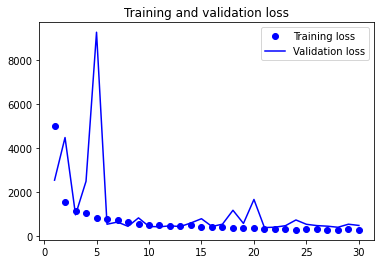

In [ ]:
import matplotlib.pyplot as plt
loss = history_C.history["loss"]
val_loss_C = history_C.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss_C, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

CNN 기본 모형에서 데이터 증식을 추가한 모형의 결과이다. 최소 손실 값으로는 423이 나왔고, 그래프의 모양이 불안정하다. 기본 모형보다 더 높은 값이 나왔으므로 데이터 증식 방법은 더 이상 사용하지 않았으며 높은 값이 나온 이유로는 아래 예시처럼 고정된 상태로 사진이 찍혔기 때문인 것으로 보인다.

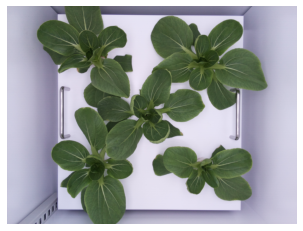

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

plt.axis("off")
plt.imshow(load_img(train_img_path[1]));

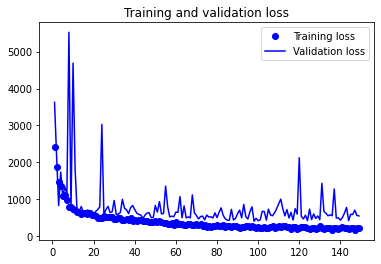

In [ ]:
import matplotlib.pyplot as plt
loss = history_C1.history["loss"][1:]
val_loss = history_C1.history["val_loss"][1:]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

CNN 기본 모형에서 완전연결층과 드롭아웃 층을 추가한 모형의 결과이다. 최소 손실 값은 150이 나왔고, 그래프 모양이 안정적이지는 않다. 최적화를 Adam으로 한 훈련이 RmsProp보다 훈련 결과가 안정적이었다. 기본 모형보다 더 낮은 손실 값을 보이므로 이 방법은 보류하였다.

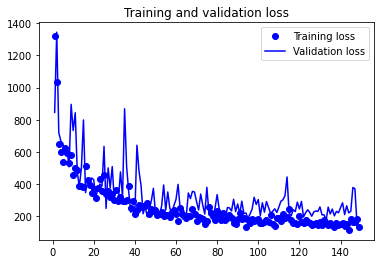

In [ ]:
import matplotlib.pyplot as plt
loss = history_C2.history["loss"][1:]
val_loss = history_C2.history["val_loss"][1:]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

CNN 기본 모형에서 L1, L2 규제를 추가한 모형의 결과이다. 최소 손실 값은 154가 나왔으며, 초반부의 검증 데이터 손실 값이 불안정해 후반부의 값이 안정되어 보인다. 기본 모형보다 더 낮은 손실 값이 나오기에 이 방법 또한 보류하였고, RNN을 시도하면서 여러 번 모형을 돌려본 결과 층을 추가하는 것보다 규제를 하는 게 더 안정적인 훈련 결과를 내었다. L2 규제를 단독으로 한 것과 L1 규제를 추가한 것은 차이가 거의 없었다. 또한 층을 추가한 모형에 규제를 추가해보았으나 좋은 결과를 내지 못하였으므로 따라서 L1, L2 규제만 추가한 모형을 고정하여 RNN 모형을 적용하였다.

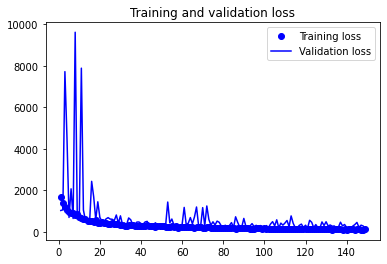

In [ ]:
import matplotlib.pyplot as plt
loss = history_C4.history["loss"][1:]
val_loss = history_C4.history["val_loss"][1:]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

RNN 기본 모형의 손실 결과이다. 최소 손실 값은 17723이며 이 또한 CNN 기본 모형에서처럼 더 많은 훈련을 통해 검증 데이터의 손실 값을 관찰할 필요가 있다.

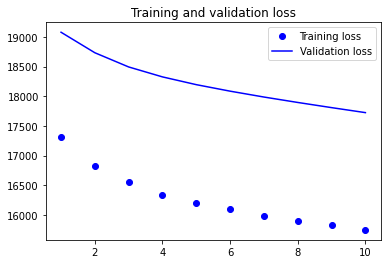

In [ ]:
import matplotlib.pyplot as plt
loss = history_R.history["loss"]
val_loss_R = history_R.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss_R, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

RNN 기본 모형에서 필요 없는 변수를 제거한 모형의 결과이다. 최소 손실 값은 15026이 나왔고, 변수를 4개 제거했을 때나 일간누적분무량을 추가로 제거했을 때나 차이가 거의 없었다.

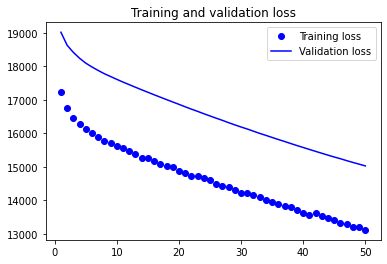

In [ ]:
import matplotlib.pyplot as plt
loss = history_R2.history["loss"]
val_loss = history_R2.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

RNN 기본 모형에서 모형 자체를 변경한 결과이다. 기본 RNN 층은 변경하기 전과 똑같은 추세를 보였다. 양방향 RNN이 속도가 빨라 더 많은 훈련을 시켜보았고, 그래프를 보면 후반부에 손실이 조금 튀긴 하지만 과적합이 일어나는 것으로 보이진 않는다. 하지만 손실함수로 쓴 mse 대신 mae를 보면 어느 시점부터 더 이상 내려가지 않는 것을 보아 과적합이 일어났다고 판단했다.

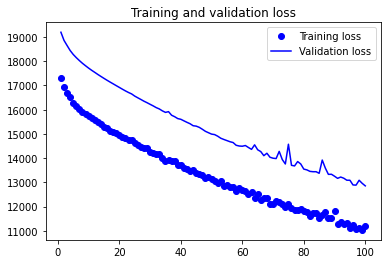

In [ ]:
import matplotlib.pyplot as plt
loss = history_R3.history["loss"]
val_loss = history_R3.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

기본적으로 아래 출력 값과 같이 RNN의 결과는 CNN보다 매우 좋지 않으며, 따라서 검증 데이터의 결과만 보는 것이 아닌 두 모형이 각각 예측한 값을 가중치 평균하여 가장 좋은 제출 결과를 낸 RNN 모형을 고정하였다.

In [ ]:
print(min(val_loss_C))
print(min(val_loss_R))

371.9046325683594
17723.748046875


### 대회 제출 모델 및 결과 (5/19 기준)

실제 대회 종료일은 5/19였기에, 당시 제출했던 모델에 대한 간략한 소개를 덧붙이고자 한다. 
- 단독 CNN 모델만을 사용했다.
- 입출력을 동일하게 하기 위해 Padding을 사용했다. 
- 다운 샘플링을 위해 Stride 대신 MaxPooling 층을 사용했다. 
- 잎 면적 예측을 위한 회귀 문제임을 감안해, 손실함수 'mse' 를 넣었다. 
- 홈페이지 제출 결과 (0.2272188178)



```
inputs = keras.Input(shape=(128, 128, 3))
x = layers.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1)(x)
model_k = keras.Model(inputs=inputs, outputs=outputs)
```
```
model_k.compile(optimizer="rmsprop",
                loss="mse",
                metrics=['mae', 'mse'])
```

```
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
```
```
history = model_k.fit(train_x, train_y,
                      epochs=30,
                      validation_data=[validation_x, validation_y],
                      batch_size=8,
                      callbacks=callbacks)
```
```
test_images = list(map(process_path, test_img_path))
test_x = np.array(test_images)

test_model = keras.models.load_model("convnet_from_scratch.keras")
preds = test_model.predict(test_x)
```



### 대회 제출 파일 관련 코드

 results_test = [  ] 를 통해 환경 데이터를 불러온다. 


In [ ]:
test_csv_files = sorted(glob(dpath + "/test/meta/*.csv"))

In [ ]:
results_test = []
for test_csv_file in tqdm(test_csv_files):
    df_csv = pd.read_csv(test_csv_file)
    image = os.path.split(test_csv_file)[1].split(".")[0]
    df_csv["image"] = image
    results_test.append(df_csv)

  0%|          | 0/460 [00:00<?, ?it/s]

위에서 호출한 환경 데이터(results_test)를 전처리하는 과정이 필요하다. 전처리 과정은 train data와 동일하다.

 (1) 최근 분무량 결측치를 처리한다. (bfill, ffill, interpolate 등)

 (2) 청색광추정광량의 경우 '총추정광량 - 백색광추정광량 - 적색광추정광량'으로 적용한다.

 (3) Min-Max Scaling 통해 데이터를 정제한다.

In [ ]:
for i in range(len(results_test)):
    results_test[i]["최근분무량"][results_test[i]["최근분무량"] > 30000] = np.NAN
    results_test[i]["최근분무량"] = results_test[i]["최근분무량"].fillna(method='bfill', limit=1)
    results_test[i]["최근분무량"] = results_test[i]["최근분무량"].fillna(method='ffill', limit=1)
    results_test[i] = results_test[i].interpolate()
    results_test[i].fillna(method='bfill', inplace=True)
    results_test[i].fillna(method='ffill', inplace=True)

    water = results_test[i]['최근분무량'].round(2).tolist()
    if np.mean(water) > 1000:
        nums = [list(v) for k, v in groupby(water, key = lambda x: x != 0) if k != 0]
        if len(nums) == 2:
            cumulative = nums[0][-1] - nums[0][0] + nums[1][-1]
        else:
            cumulative = nums[0][-1] - nums[0][0]
            
    elif 1000 > np.mean(water) > 0:
        nums = [key for key, _group in groupby(water)]
        cumulative = sum(nums[1:])
    else:
        cumulative = 0

    results_test[i]['최근분무량'] = cumulative

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for i in range(len(results_test)):
    results_test[i] = results_test[i].rename(columns = {'최근분무량' : '일간누적분무량'})
    results_test[i][features[-1]] = results_test[i][features[-4]] - results_test[i][features[-3]] - results_test[i][features[-2]]

In [ ]:
test_csv = []

for i in range(len(results_test)):
    test_csv_ing = results_test[i][features_final].copy()
    test_csv.append(test_csv_ing)

In [ ]:
min_val = []
max_val = []

for i in range(len(results_test)):
    max_val_ing, min_val_ing = test_csv[i].max(), test_csv[i].min()
    max_val.append(max_val_ing)
    min_val.append(min_val_ing)
    test_csv[i] = (test_csv[i] - min_val[i]) / (max_val[i] - min_val[i])
    test_csv[i] = test_csv[i].replace(np.NAN, 0)

최종 예측 값(preds)을 구축하는 과정이다.

 - test에 사용되는 image 파일 호출하여, 이를 넘파이 배열로 변경한 test_x를 만든다.

 - 위에서 전처리 과정을 거친 meta data도 넘파이 배열로 변경하여 test_x_csv를 만든다.

 - Preds_C: CNN 훈련 시, callback_C에 저장된 최적 모델로 test_x를 예측한 값이다.

 - Preds_R: RNN 훈련 시, callback_R에 저장된 최적 모델로 test_x_csv를 예측한 값이다.

 - Preds_C에 80%, Preds_R에 20%의 가중치를 두어 최종적인 예측 값인 preds를 만든다. 

 - i = max(i,0)을 통해 preds 값이 음수가 나온 경우, 이를 0으로 바꿔주는 코드를 추가로 넣었다.



In [ ]:
test_images = list(map(process_path, test_img_path))
test_x = np.array(test_images)

In [ ]:
test_x_csv = np.array(test_csv)

In [ ]:
test_model_C = keras.models.load_model("convnet_from_scratch.keras")
preds_C = test_model_C.predict(test_x)

In [ ]:
test_model_R = keras.models.load_model("jena_lstm_dropout.keras")
preds_R = test_model_R.predict(test_x_csv)

In [ ]:
preds_C

array([[ 77.415985 ],
       [326.24554  ],
       [  2.7490463],
       [ 83.20615  ],
       [ 93.9647   ],
       [ 91.46053  ],
       [  3.3484728],
       [ 94.94642  ],
       [  2.4112182],
       [ 94.45745  ],
       [  3.358413 ],
       [ 42.475765 ],
       [ 10.863812 ],
       [ 38.33102  ],
       [ 13.595535 ],
       [ 90.261604 ],
       [ 92.64732  ],
       [ 40.476948 ],
       [ 95.14347  ],
       [309.70444  ],
       [ 45.89556  ],
       [  5.2438536],
       [  3.358461 ],
       [ 49.44981  ],
       [ 83.694565 ],
       [ 90.66132  ],
       [143.9756   ],
       [ 62.08557  ],
       [ 90.43381  ],
       [ 97.67612  ],
       [ 89.25223  ],
       [ 15.8637295],
       [  3.3204474],
       [  4.616337 ],
       [ 11.530159 ],
       [178.1967   ],
       [  3.9071155],
       [ 96.387856 ],
       [  3.30298  ],
       [ 48.468067 ],
       [ 87.90527  ],
       [ 84.37691  ],
       [  2.505278 ],
       [ 36.985332 ],
       [ 86.328964 ],
       [ 3

In [ ]:
preds_R

array([[12.150291 ],
       [12.156345 ],
       [12.125932 ],
       [12.153292 ],
       [12.124909 ],
       [12.149171 ],
       [12.158028 ],
       [12.158288 ],
       [12.146068 ],
       [12.158974 ],
       [12.158191 ],
       [12.1282215],
       [12.119535 ],
       [12.161576 ],
       [12.106446 ],
       [12.148611 ],
       [12.151649 ],
       [12.159289 ],
       [12.128508 ],
       [12.160352 ],
       [12.128048 ],
       [12.159239 ],
       [12.125192 ],
       [12.123011 ],
       [12.157653 ],
       [12.161377 ],
       [12.154568 ],
       [12.149083 ],
       [12.167116 ],
       [12.130606 ],
       [12.1692505],
       [12.146972 ],
       [12.159962 ],
       [12.155982 ],
       [12.119872 ],
       [12.159835 ],
       [12.159034 ],
       [12.162457 ],
       [12.1532345],
       [12.157929 ],
       [12.157985 ],
       [12.118539 ],
       [12.156541 ],
       [12.128512 ],
       [12.129464 ],
       [12.120893 ],
       [12.160527 ],
       [12.13

In [ ]:
preds = preds_C * 0.8 + preds_R * 0.2

In [ ]:
for i in preds:
    i = max(i, 0)

In [ ]:
preds

array([[ 57.836277 ],
       [232.01877  ],
       [  5.562112 ],
       [ 61.89029  ],
       [ 69.412766 ],
       [ 67.66712  ],
       [  5.9913397],
       [ 70.10998  ],
       [  5.331673 ],
       [ 69.76791  ],
       [  5.9983463],
       [ 33.371502 ],
       [ 11.240529 ],
       [ 30.480188 ],
       [ 13.1488085],
       [ 66.827705 ],
       [ 68.49862  ],
       [ 31.98165  ],
       [ 70.238976 ],
       [220.44121  ],
       [ 35.76531  ],
       [  7.318469 ],
       [  5.9884806],
       [ 38.25177  ],
       [ 62.23349  ],
       [ 67.111336 ],
       [104.42929  ],
       [ 47.104626 ],
       [ 66.9538   ],
       [ 72.01247  ],
       [ 66.127335 ],
       [ 14.748702 ],
       [  5.9723015],
       [  6.8782306],
       [ 11.707072 ],
       [128.38564  ],
       [  6.3826914],
       [ 71.12023  ],
       [  5.9580564],
       [ 37.575027 ],
       [ 65.18108  ],
       [ 62.699398 ],
       [  5.400657 ],
       [ 29.528286 ],
       [ 64.069115 ],
       [ 2

마지막으로 결과 제출 파일에 대한 관련 코드이다.

 - 대회의 목적은 잎의 면적을 예측해내는 것이다. 
 - 대회에서 요구한 submisson 파일 내에, 잎 면적에 해당하는 leaf_weight 부분을 위에서 만든 예측 값(preds)으로 채워준다.
 - 해당 파일을 홈페이지에 제출하면 과정은 완료된다.

In [ ]:
submission = pd.read_csv(dpath + 'sample_submission.csv')
submission['leaf_weight'] = preds
submission.to_csv(dpath + 'submit.csv', index=False)

### < 모델 구축 과정 / 결과 일지 >

1. 5/30일 점수: 0.2784627048 (기준 : CNN + RNN)

- 대회 종료 전과 비교하여, meta 데이터를 반영한 RNN 모델을 추가하였다.  CNN 0.9, RNN 0.1 가중치를 둔 모델이다. 


2. 6/2일 점수: 0.1856166363 (shuffle 시도 X + 결측 데이터 전부 제거)

- 5/30일에 제출한 모델에서 데이터 shuffle을 시도하지 않음과 동시에 RNN 및 CNN 모델 내 모든 결측 데이터를 제거하고 얻은 점수이다. CNN에서는  과적합이 발생하지 않아 epoch=150으로 훈련했다.


3. 6/6일 점수: 0.2372371131 (RNN 내 feature 항목 4개 제거)

- 5/30일에 제출한 모델에서, RNN 모델의 meta 데이터 내 features 항목에서 총추정광량, 화이트LED 동작 강도, 레드LED 동작강도, 블루LED 동작 강도를 제거하였다. 또한 layers.LSTM(recurrent_dropout=0.25)를 0.5로 바꾼 후 나온 결과값이다. 


4. 6/6일 점수: 0.254090849 (RNN – Bidirectonal( ) 적용)

- 5/30일에 제출한 모델에서, Layers.Bidirectional으로 변경한 후 나온 결과값이다. Bidirectional( )함수는 양방향 LSTM으로, 순차적인 입력값에 대해 이전 데이터와의 관계뿐만 아니라 이후 데이터와의 관계까지도 학습한다. 


5. 6/13일 점수: 0.1802701383 (RNN 0.2, epoch 10 + CNN 0.8 / feature 일간누적분무량 추가 제거)

- 6/2일에 제출한 모델에서 RNN 0.2, CNN 0.8 가중치를 두고 얻은 결과다. RNN 모델을 epoch 10으로 학습하였기 때문에, RNN은 학습이 충분히 이뤄진 모델이라 부르기 어렵다. Feature에서 기존에 제거한 4개의 변수(총추정광량, 화이트LED 동작 강도, 레드LED 동작강도, 블루LED 동작 강도)에서 일간누적분무량을 추가로 제거했다. 다만, preds_R에서의 변화가 유의미하지 않아 feauture를 추가로 제거한 것은 큰 의미가 없어 보인다. 



# **4. 결론**

##최적 모델 결정하기

가장 좋은 결과를 낸 모델은 가장 낮은 score를 얻은 Case5로,

1. 어떠한 결측치도 존재하지 않으면서 
2. 5개의 feature가 제거되었고
3. 각각 CNN에 80%, RNN에 20%의 가중치를 부여한 모델이었다.


- CNN은 특히 Image Recognition에서 효과가 뛰어난 모델이고, RNN은 순서가 존재하는 series-data(특히 text)에서 효과가 뛰어난 모델이다. 우리가 참가한 대회는 청경채의 사진과 환경데이터(시계열)를 동시에 이용하여 알고리즘을 구현하는 것이 목적인 대회이기 때문에 CNN과 RNN을 결합한 모델을 사용하는 것이 당연하게도 최상의 결과를 낼 수 있는 것이라 추측할 수 있었다.

Case5는 타 case들과는 다르게, CNN 가중치의 비율을 줄이고, RNN 가중치의 비율을 늘린 case였다.  (각각 10%씩 늘리고 줄임) 


- CNN을 제어하기 위한 RNN의 비율, 즉 최적의 결과를 도출하기 위해 CNN과 RNN에 각각 얼마의 가중치를 줄 지를 결정하기까지 많은 시도가 있었다.
- CNN : RNN = 8 : 2, 7.5 : 2.5, 7 : 3 등 여러 번의 시도(trial-and-error) 끝에 CNN과 RNN의 비율이 8:2일 때 가장 최적의 결과를 얻을 수 있었다. (그러나 CNN 비율 > RNN 비율, CNN 비율 > 0.6은 초기에 가정하고 시작하였다.)

##인사이트 

1. L1 & L2 regularization은 예상보다 오버피팅에 매우 효과적이었다.
2. 데이터 전처리 과정은 모델링에 빠져서는 안 될 필수적인 과정이다. 
- 이는 전처리가 이뤄지지 않은 Case1 (score=0.27) vs 전처리가 이뤄진 Case2 (score=0.18) 에서 두드러진다.
3. Not-fully-trained RNN은 모델로서의 고유한 RNN 역할 대신 CNN의 제어 상수 역할을 할 수 있다.


    1) epochs=10 의 RNN. 즉, 훈련이 덜 된 RNN 
    2) epcohs=50~100의 RNN. 즉, 훈련이 된 RNN
- 아이러니 하게 위의 두 상황에서 더 좋은 결과를 내는 것은 첫 번째 상황이다. 훈련이 덜 된 모델이 더 좋은 결과를 낸다는 것은 그 모델이 크게 의미있지 않은 것이라 볼 수 있다. 
- 예를 들어 epochs=10일 때의 RNN 값은 거의 수렴하는 상수로 나타나는데,  이는 train 후에 넓게 분포하게 되는 CNN의 값을, 수렴하는 상수의 값을 가진 RNN이 제어하여 최적의 CNN+RNN 결과를 도출할 수 있는 것이다.

##한계점

1. About Meta data
- 대회에 참가한 팀들 중 meta data를 아예 고려하지 않은 팀들이 있었고, 이를 통해 더 좋은 score를 가져간 팀도 있었다.
- meta data 자체에 결측치 혹은 잘못 계산된 관측치들이 많았기 때문이라고 해석할 수 있는데 이 때문에 meta data를 사용하는 것이 최선인 것인지라는 의문에 부딪히기도 하였다.
- 최적의 모델로 결정된 CNN+RNN은 우선적으로 RNN의 fully-trained가 전제되어야 best performance를 내는 모델이다. 그런데 meta data를 위한 RNN모델은 우리 meta data 자체의 특성(결측치가 너무 많고 잘못 계산된 feature도 존재)으로 인해 그 영향력이 크지 못했다.
2. About image data
- image data에 대한 전처리는 수행하지 못했다. 데이터의 수가 너무 많았을 뿐더러 어떻게 train하기 좋게 이미지를 보정하고(ex: 색, 음영, 명도, 채도 등) 오류가 있는 이미지(ex: 잘못 찍힌 이미지)를 효율적으로 제거할 지에 대한 지식과 시간이 부족했던 것 같다.


##보완할 점
1. **Meta data**: 단순히 결측치를 제거하는 것에서 더 나아가, 어떻게 최적의 train 결과를 얻을 수 있는 효과적인 전처리를 할 수 있을지 고차원적으로 고민할 필요가 있다.
2. **'multi-input' 방식**: meta data의 feature와 이미지 feature를 동시에 받아 concatenate하여 이를 input으로 하는 multi-input 형태의 새로운 모델 구축을 시도해 볼 필요가 있다.
3. **Data Augmentation**: 우리는 data augmentation 방법으로
```
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
```
위와 같이 Flip, Rotation, Zoom을 전부 사용하였다. 

    그러나 Flip과 Rotation 없이 Zoom만을 사용하는 Augmentation을 진행해 볼 필요가 있다.



4. 적절한 Pre-trained 모델을 선정하여 전이학습을 할 필요가 있어보인다. 

    특히 CNN을 이용한 이미지 분류에 좋은 모델인 'VGGNet', 'GoogLeNet', 'ResNet'을 시도해보는 것이 좋을 것이다.


(* 전이학습이란, 특정 분야에서 학습된 신경망의 일부 능력을 유사하거나 전혀 새로운 분야에서 사용되는 신경망의 학습에 이용하는 것을 의미한다. 전이학습을 통해 기존의 학습된 모델을 사용함으로써 학습이 더욱 빠르고 예측력이 높은 새로운 모델을 만들 수 있다.)
